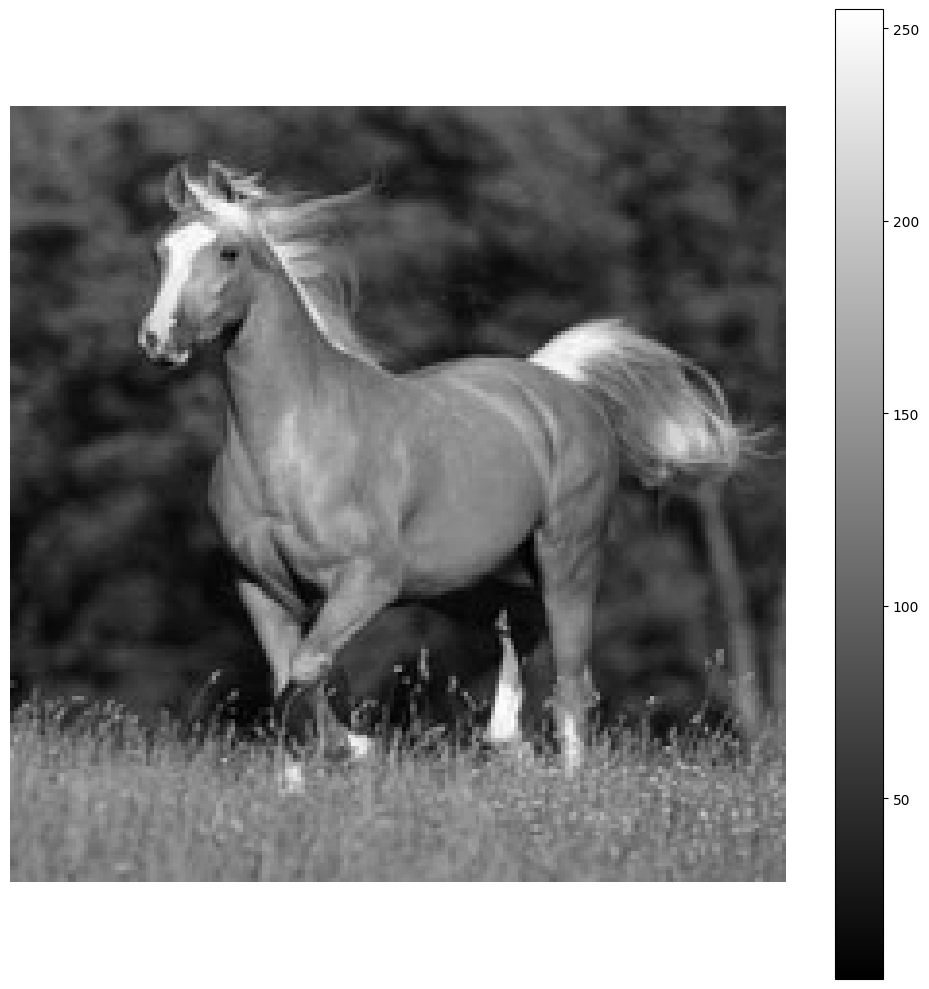

(200, 200)
89.19333829081828


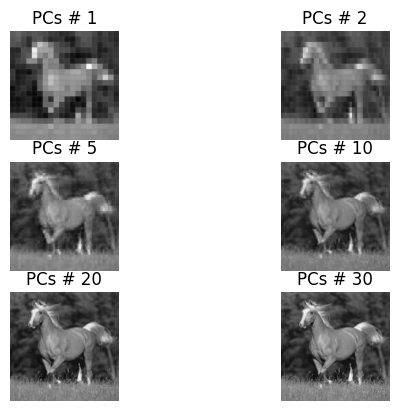

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import Image
from numpy.linalg import eig
from numpy import cov
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator

def plot_1d_arrays(arrays: list):
    n = len(arrays)

    grid_size = int(np.ceil(np.sqrt(n)))

    fig, axes = plt.subplots(int(np.ceil(n/grid_size)), grid_size, figsize=(10, 10))
    if n > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
        
    for i, image in enumerate(arrays):
        if i < n:
            ax = axes_flat[i]
            im = ax.imshow(image, cmap='gray')
            ax.axis('off')
            fig.colorbar(im, ax=ax)
        else:
            axes_flat[i].axis('off')

    plt.tight_layout()
    plt.show()


def LoadImage():
    image = Image.open("palomino_horse.png")
    img = np.array(image)
    img =  img[:,:,0]

    #Generate 400 block of 10 x 10 pixels
    #print (img[:, :, 0]) #R
    #print "-"
    #print img[:,:,1] #G
    #print "-"
    #print img[:,:,2] #B

    #All channels have same values just pick one

    im_width,im_height =image.size
    pixel_block = 10
    Features=[]
    for i in range(0,im_height,pixel_block): #row
        for j in range(0,im_width,pixel_block): #coliumn

            end_row = i+pixel_block
            end_column = j+pixel_block

            Features.append(img[end_row-pixel_block:end_row,end_column-pixel_block:end_column]) #100 dimensional vector 10 x 10


    Features=np.array(Features)

    Features=Features.reshape(Features.shape[0],Features.shape[1]*Features.shape[2])
    return Features,img


def PCA(Features,image,n_components):

    D, V = eig(cov(Features, rowvar=False))

    V = V[:, np.argsort(D)]  # Eigen vector with maximum variance is at last

    # eigen values are not very similar there is variation so the dataset is not in a good subspace

    X = Features - np.tile(Features.mean(axis=0), [Features.shape[0], 1])  #Centre data
    D = sorted(D, reverse=True)
    var = []

    for k in range(3):
        var.append(D[k])

    # Find info given by first component
    print(np.sum(var)/np.sum(D)*100)
    #print "Variance", var
    #print "Component 1", V[:, -1]
    #print X.shape
    # Map X through the PCA (rotate axes):

    Z=  np.matmul(X, V) #score
    num=1

    for component in n_components:

        T = Z[:,V.shape[0]-component:V.shape[0]]  # n pca

        E =  V[:, V.shape[0]-component:V.shape[0]] # n pca components(most variance)

        R = np.dot(T,np.transpose(E)) + np.mean(Features,axis=0)



    #Now reconstruct the whole image

        pixel_block = 10
        im_height= 200
        im_width=200
        Reconstructed_image = np.zeros(shape=(200,200))
        x=0
        for i in range(0, im_height, pixel_block):  # row (200)  #run 20 times
            for j in range(0, im_width, pixel_block):  #column (200)  #run 20 times
                end_row = i + pixel_block
                end_column = j + pixel_block
                Reconstructed_image[end_row-pixel_block:end_row,end_column-pixel_block:end_column]=np.reshape(R[x],(10,10))
                x+=1

        ax = subplot(3, 2, num, frame_on=False)
        ax.xaxis.set_major_locator(NullLocator())  # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        num += 1
        plt.imshow(np.flipud(Reconstructed_image),cmap='gray',origin='lower')
        plt.title('PCs # ' + str(component))

    plt.show()

    # plt.imshow(Reconstructed_image,cmap='gray')
    #plt.show()







n_components=[1,2,5,10,20,30]
Features,image = LoadImage()
plot_1d_arrays([image])
print(image.shape)
PCA(Features,image,n_components)





In [25]:
print(Features.shape)

D, V = eig(cov(Features, rowvar=False))
print(D.shape, V.shape)
print(cov(Features).shape)
# V = V[:, np.argsort(D)]  # Eigen vector with maximum variance is at last

# # eigen values are not very similar there is variation so the dataset is not in a good subspace

# X = Features - np.tile(Features.mean(axis=0), [Features.shape[0], 1])  #Centre data
# D = sorted(D, reverse=True)
# var = []

# for k in range(3):
#     var.append(D[k])

# # Find info given by first component
# print(np.sum(var)/np.sum(D)*100)

(400, 100)
(100,) (100, 100)
(400, 400)
